In [1]:
import pandas as pd

In [7]:
pd.options.display.max_rows = 20
surveys_df = pd.read_csv("data/surveys.csv")

In [12]:
surveys_df[(surveys_df['year'] > 1990) & (surveys_df['year'] < 2000)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
18189,18190,1,11,1991,7,RM,F,17.0,11.0
18190,18191,1,11,1991,12,OL,M,21.0,31.0
18191,18192,1,11,1991,17,RM,F,16.0,9.0
18192,18193,1,11,1991,2,DM,F,34.0,48.0
18193,18194,1,11,1991,12,DO,F,36.0,36.0
...,...,...,...,...,...,...,...,...,...
30153,30154,12,6,1999,15,PP,F,20.0,13.0
30154,30155,12,6,1999,16,RM,F,16.0,14.0
30155,30156,12,6,1999,5,NaN,NaN,NaN,NaN
30156,30157,12,6,1999,7,NaN,NaN,NaN,NaN


In [13]:
import plotnine as p9

In [14]:
surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

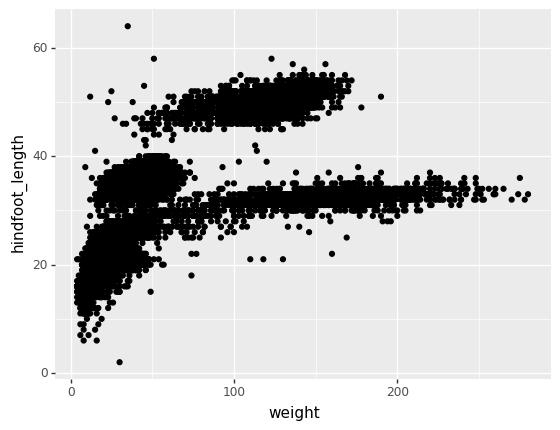

<ggplot: (7554007197)>

In [17]:
(p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='weight',y='hindfoot_length')) 
 + p9.geom_point()
)

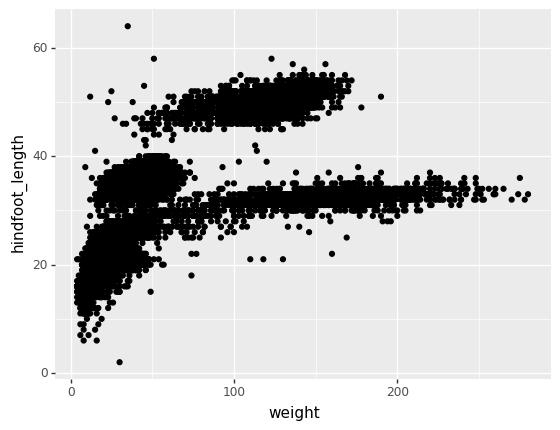

<ggplot: (7556628557)>

In [22]:
surveys_plot = p9.ggplot(data=surveys_complete,
    mapping = p9.aes(x='weight',y='hindfoot_length'))
                         
surveys_plot + p9.geom_point()

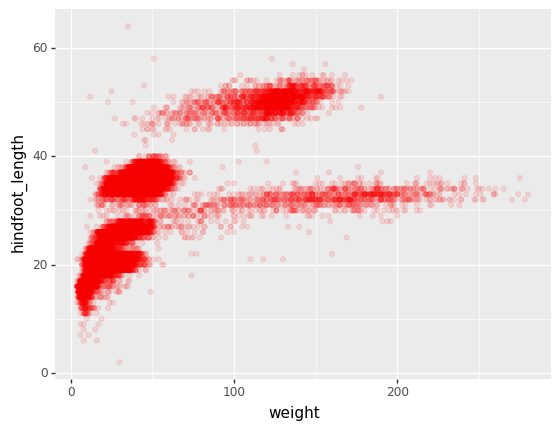

<ggplot: (7558320353)>

In [26]:
surveys_plot + p9.geom_point(alpha=0.1, color='red')

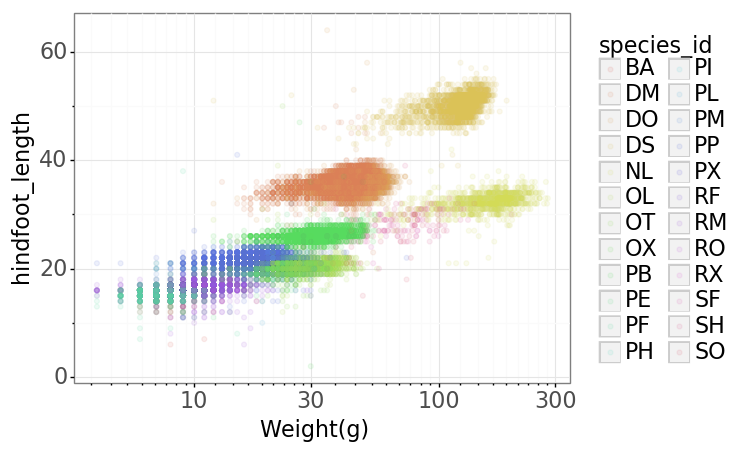

<ggplot: (7554015713)>

In [32]:
surveys_plot = p9.ggplot(data=surveys_complete,
    mapping = p9.aes(x='weight',
                     y='hindfoot_length',
                     color='species_id'))
(surveys_plot + p9.geom_point(alpha=0.1) + 
 p9.xlab("Weight(g)") + p9.scale_x_log10()
 + p9.theme_bw() + p9.theme(text=p9.element_text(size=16)))

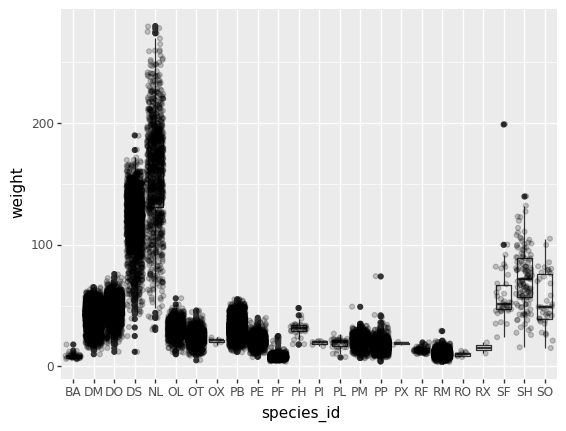

<ggplot: (7557916757)>

In [35]:
plot = p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
plot + p9.geom_boxplot(alpha=0) + p9.geom_jitter(alpha=0.2)

In [36]:
yearly_counts = surveys_complete.groupby(['year','species_id'])['species_id'].count()
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

In [38]:
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


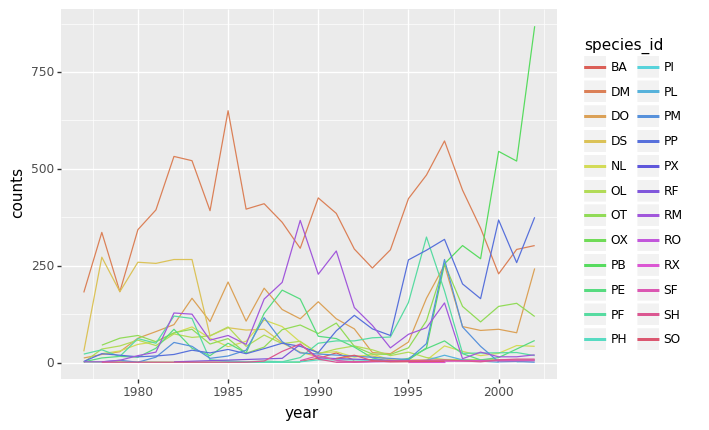

<ggplot: (7555254441)>

In [40]:
plot = p9.ggplot(data=yearly_counts,
          mapping=p9.aes(x='year',y='counts',color='species_id'))
plot + p9.geom_line()

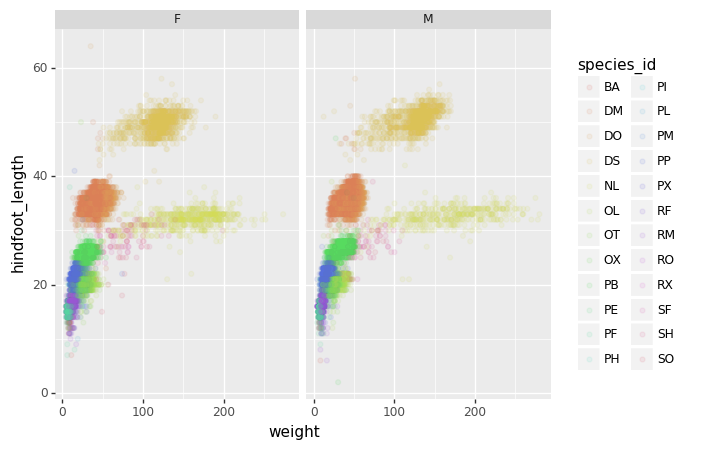

<ggplot: (7555743497)>

In [42]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("sex"))

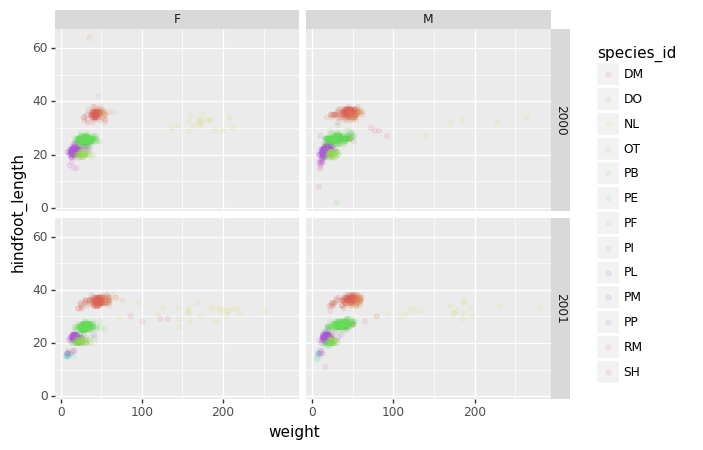

<ggplot: (7555119061)>

In [43]:
# only select the years of interest
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001])]

(p9.ggplot(data=survey_2000,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("year ~ sex")
)

In [46]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=10))
my_plot = (p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + my_custom_theme
)

my_plot.save("plot.png",width=10, height=10,dpi=300)

/Users/tmorrell/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/tmorrell/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plot.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


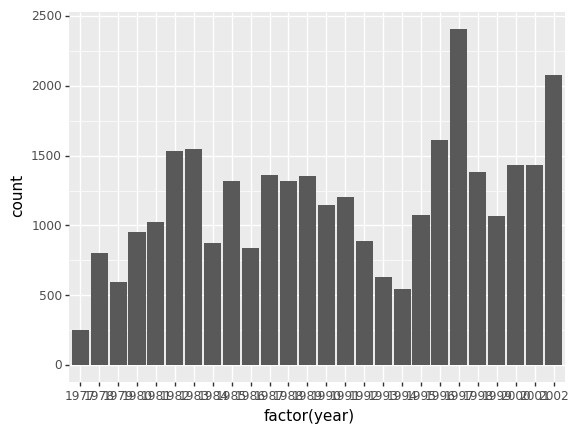

<ggplot: (7555117565)>

In [45]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
)